# 앙상블 학습과 랜덤포레스트

# 1. 투표 기반 분류기

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42)),
    ])

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
for name,clf in voting_clf.named_estimators_.items():
  print(name, '=', clf.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896


In [ ]:
voting_clf.predict(X_test[:1])

array([1])

In [ ]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

In [ ]:
voting_clf.score(X_test, y_test)

0.912

In [ ]:
voting_clf.voting = 'soft'
voting_clf.named_estimators['svc'].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

# 2. 배깅과 페이스팅

## 배깅

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9017857142857143

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9210526315789473

In [ ]:
bag_clf.oob_decision_function_[:3] # 처음 3개의 샘플에 대한 확률

array([[0.55555556, 0.44444444],
       [0.99404762, 0.00595238],
       [0.00571429, 0.99428571]])

## 페이스팅

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

notbag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=False,
                            max_samples=100, n_jobs=-1, random_state=42)
notbag_clf.fit(X_train, y_train)

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

In [ ]:
# 페이스팅은 oob가 존재하지 않음
notbag_clf.oob_score_

AttributeError: 'BaggingClassifier' object has no attribute 'oob_score_'

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = notbag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9210526315789473

배깅이랑 페이스팅 방식 모두 확률이 동일하게 출력

In [ ]:
# 페이스팅은 oob가 존재하지 않음
notbag_clf.oob_decision_function_[:3] # 처음 3개의 샘플에 대한 확률

# 4. 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
bag_clf = BaggingClassifier(
                            DecisionTreeClassifier(max_features='sqrt', max_leaf_nodes=16),
                            n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
# 동일한 예측하는 지 비교
import numpy as np
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
np.all(y_pred_bag == y_pred_rf)

True

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)

for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
  print(round(score,2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


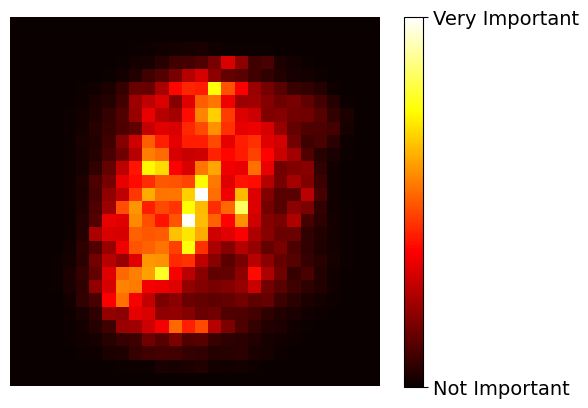

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True,
                                as_frame=False, parser='auto')

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_mnist, y_mnist)

heatmap_image = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(heatmap_image, cmap="hot")
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                           rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not Important', 'Very Important'], fontsize=14)
plt.axis("off")
plt.show()

# 5. 부스팅

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

In [ ]:
ada_clf.score(X_test, y_test)

0.904

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.05*np.random.randn(100)
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
# 첫 번째 예측기에서 생긴 잔여 오차에 두 번째 DecisionTreeRegressor를 훈련
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=43)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2, random_state=43)

In [ ]:
# 두 번째 예측기가 만든 잔여 오차에 세 번째 회귀 모델을 훈련
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=44)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=44)

In [ ]:
# 모든 트리의 예측을 더함
X_new = np.array([[-0.4], [0.], [0.5]])
sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

array([0.49484029, 0.04021166, 0.75026781])

In [ ]:
# GradientBoostingRegressor를 사용하여 GBRT 앙상블을 훈련
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=4,
                                 learning_rate=1.0, random_state=42
                                 )
gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=4,
                          random_state=42)

In [ ]:
gbrt_best = GradientBoostingRegressor(max_depth=2, learning_rate=0.05, n_estimators=500,
                                      n_iter_no_change=10, random_state=42
                                 )
gbrt_best.fit(X,y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [ ]:
gbrt_best.n_estimators_

92

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
  tarball_path = Path('datasets/housing.tgz')
  if not tarball_path.is_file():
    Path('datasets').mkdir(parents=True, exist_ok=True)
    # 압축한 tgz 파일 내려받기 -> 내려받는 일을 자동화하면 여러 기기 데이터셋을 설치할 때도 편리
    url = 'https://github.com/ageron/data/raw/main/housing.tgz'
    urllib.request.urlretrieve(url,tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path='datasets') # 데이터 추출
  return pd.read_csv(Path('datasets/housing/housing.csv')) ## 오류 발생 시, 새 노트를 열어서 실행

housing = load_housing_data() # 데이터 로드

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder

hgb_reg = make_pipeline(
    make_column_transformer((OrdinalEncoder(), ['ocean_proximtiy']),
                            remainder='passthrough'),
     HistGradientBoostingRegressor(categorical_features=[0], random_state = 42)
        )
hgb_reg.fit(housing, housing_labels)

NameError: name 'housing_labels' is not defined

# 6. 스태킹

In [ ]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators = [('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))],
    final_estimator = RandomForestClassifier(random_state=43),
    cv=5 # 교차 검증 폴드 개수
)

stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

In [ ]:
stacking_clf.score(X_test, y_test)

0.92

# 연습문제 8

In [ ]:
X_train, y_train = X_mnist[:50_000], y_mnist[:50_000]
X_valid, y_valid = X_mnist[50_000:60_000], y_mnist[50_000:60_000]
X_test, y_test = X_mnist[60_000:], y_mnist[60_000:]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, dual=True, random_state=42)
mlp_clf = MLPClassifier(random_state=42)

In [ ]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]
for estimator in estimators:
  print("훈련 모델:", estimator)
  estimator.fit(X_train, y_train)

훈련 모델: RandomForestClassifier(random_state=42)
훈련 모델: ExtraTreesClassifier(random_state=42)
훈련 모델: LinearSVC(max_iter=100, random_state=42, tol=20)
훈련 모델: MLPClassifier(random_state=42)


In [ ]:
[estimator.score(X_valid, y_valid) for estimator in estimators]

[0.9736, 0.9743, 0.8662, 0.9613]

In [ ]:
from sklearn.ensemble import VotingClassifier
named_estimators = [
("random_forest_clf", random_forest_clf),
("extra_trees_clf", extra_trees_clf),
("svm_clf", svm_clf),
("mlp_clf", mlp_clf),
]
voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('svm_clf',
                              LinearSVC(max_iter=100, random_state=42, tol=20)),
                             ('mlp_clf', MLPClassifier(random_state=42))])

In [ ]:
voting_clf.score(X_valid, y_valid)

0.975

In [ ]:
voting_clf.score(X_test, y_test)

0.9712

In [ ]:
# 개별 분류기의 테스트 성능
[estimator.score(X_test, y_test.astype(np.int64))
for estimator in voting_clf.estimators_]

[0.968, 0.9703, 0.8612, 0.9618]

In [ ]:
svm_clf_trained = voting_clf.named_estimators_.pop("svm_clf")
voting_clf.estimators_.remove(svm_clf_trained)

In [ ]:
voting_clf.score(X_valid, y_valid)

0.9761

In [ ]:
voting_clf.score(X_test, y_test)

0.9733